# preamble

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from geodatasets import get_path
import numpy as np
import xarray as xr

import sys
sys.path.append('..')
from scripts.dicts import *

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_25033/3273420535.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Pathdata: /Volumes/imau01/rapid/RACMO2.3p2/FGRN055


In [2]:
path_Mankoff2020Solid = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/raw/solid_discharge/Mankoff2020Solid/"
path_Mankoff2020Solid_adjusted = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/Mankoff2020Solid/"

In [3]:
dfRegionD = pd.read_csv(path_Mankoff2020Solid + "region_D.csv", index_col=0)
dfErrorRegionD = pd.read_csv(path_Mankoff2020Solid + "region_err.csv", index_col=0)

In [9]:
fig = px.line(dfRegionD, x=dfRegionD.index, y=dfRegionD.columns, title="Monthly solid discharge per region", markers=True)
# template white
template = "plotly_white"
fig.update_layout(template=template)
# update x-axis
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="Solid discharge (Gt/month)")


In [5]:
fig = px.line(dfRegionD, x=dfRegionD.index, y=dfRegionD.columns, title="Monthly solid discharge per region", mode='lines+markers')
# template white
template = "plotly_white"
fig.update_layout(template=template)
# update x-axis
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="Solid discharge (Gt/month)")





# GATE

In [6]:
dfgatemeta = pd.read_csv(path_Mankoff2020Solid + "gate_meta.csv", index_col=0)
dfgatemeta.head()

,mean_x,mean_y,lon,lat,n_pixels,sector,region,Bjork_2015,Mouginot_2019,Zwally_2012,Moon_2008,Moon_2008_dist
gate,,,,,,,,,,,,
1,600,-812300,-44.951626,82.517509,8,77,NO,Jungersen Gletsjer,JUNGERSEN_HENSON_NARAVANA,13,101,45395
3,15700,-838380,-43.927140,82.277074,9,77,NO,Jungersen Gletsjer,JUNGERSEN_HENSON_NARAVANA,13,100,25459
4,182566,-871500,-33.163992,81.799420,13,55,NO,Marie Sophie Gletsjer,MARIE_SOPHIE_GLETSCHER,13,103,4007
5,274094,-889973,-27.868307,81.424919,36,216,NO,Hagen Br,HAGEN_BRAE,13,105,2815
6,-3633,-888366,-45.239801,81.818752,19,215,NO,Harder Gletsjer,BRIKKERNE_GLETSCHER,12,99,4720


In [7]:
dfgadeD = pd.read_csv(path_Mankoff2020Solid + "gate_D.csv", index_col=0)
dfgadeD.head()

,1,3,4,5,6,7,8,10,11,12,...,346,347,349,350,352,353,354,355,356,357
Date,,,,,,,,,,,,,,,,,,,,,
1986-04-15,0.094789,0.028592,0.135848,0.059093,0.107448,0.492288,0.074623,2.337536,1.584699,0.295697,...,0.015107,0.012808,0.597416,0.668567,0.010953,0.023916,0.001091,0.007933,0.026248,0.268153
1986-05-15,0.094793,0.028597,0.135844,0.059084,0.107421,0.492233,0.074611,2.337907,1.584810,0.295505,...,0.015109,0.012810,0.597338,0.668599,0.010955,0.023921,0.001092,0.007934,0.026252,0.268176
1986-06-15,0.094797,0.028602,0.135840,0.059074,0.107393,0.492177,0.074598,2.338291,1.584925,0.295307,...,0.015112,0.012812,0.597257,0.668632,0.010956,0.023925,0.001092,0.007936,0.026257,0.268200
1986-07-15,0.094800,0.028607,0.135837,0.059065,0.107366,0.492123,0.074586,2.338662,1.585037,0.295115,...,0.015114,0.012814,0.597179,0.668664,0.010957,0.023930,0.001092,0.007937,0.026261,0.268223
1986-08-15,0.094804,0.028613,0.135833,0.059056,0.107338,0.492067,0.074573,2.339046,1.585152,0.294916,...,0.015117,0.012816,0.597099,0.668697,0.010958,0.023935,0.001092,0.007938,0.026266,0.268247


In [12]:
folder_base = "/Volumes/imau02/rapid/Anneke/"

mask_sections = (
    folder_base
    + "RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24_copy_copy.nc"
)
ds_mask_sections = xr.open_dataset(mask_sections)
fname = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/masks1k_copy.nc"
mask1k = xr.open_dataset(fname)



In [13]:
ds_mask_sections = ds_mask_sections.assign_coords(x=ds_mask_sections.x.astype(int).values)
ds_mask_sections = ds_mask_sections.assign_coords(y=ds_mask_sections.y.astype(int).values)
# assign lat and lon
ds_mask_sections['LON']= ds_mask_sections['section_numbers_adjusted'].copy()
ds_mask_sections['LAT']= ds_mask_sections['section_numbers_adjusted'].copy()
ds_mask_sections['LON'].values = mask1k['LON'].values
ds_mask_sections['LAT'].values = mask1k['LAT'].values

In [14]:
dfgatemeta.iloc[0]

mean_x                                  600
mean_y                              -812300
lon                              -44.951626
lat                               82.517509
n_pixels                                  8
sector                                   77
region                                   NO
Bjork_2015               Jungersen Gletsjer
Mouginot_2019     JUNGERSEN_HENSON_NARAVANA
Zwally_2012                              13
Moon_2008                               101
Moon_2008_dist                        45395
Name: 1, dtype: object

In [15]:

ds = ds_mask_sections


# Load your dataset (assuming it's already loaded as 'ds')
# ds = xr.open_dataset('your_dataset.nc')

# Define the haversine function
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth specified in decimal degrees.
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


# Target coordinates
target_lon = -50
target_lat = 80

def give_section(lat, lon, ds):
    ''' Function to give the section number closest to the target coordinates
    ds = xarray dataset with the section numbers and coordinates
    '''
    # Apply the haversine function to each grid point in the dataset
    distances =  haversine(
        ds.LON.values.flatten(),
        ds.LAT.values.flatten(),
        lon,
        lat,
        )
    arg = np.argmin(distances)
    # print(ds.LON.values.flatten()[arg], ds.LAT.values.flatten()[arg] )
    # print(f"{ds['distance_to_target'].values.flatten()[arg]:.0f} m")
    return ds['section_numbers_adjusted'].values.flatten()[arg]

give_section(target_lat, target_lon, ds)


7.0

In [16]:
section_number = []
for i in range(len(dfgatemeta)):
   nr = give_section(dfgatemeta['lat'].iloc[i], dfgatemeta['lon'].iloc[i], ds)
   section_number.append(nr)
dfgatemeta['section_number'] = section_number

In [17]:
dfgatemeta.to_csv(path_Mankoff2020Solid_adjusted + "gate_meta_section_nr_adjusted.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


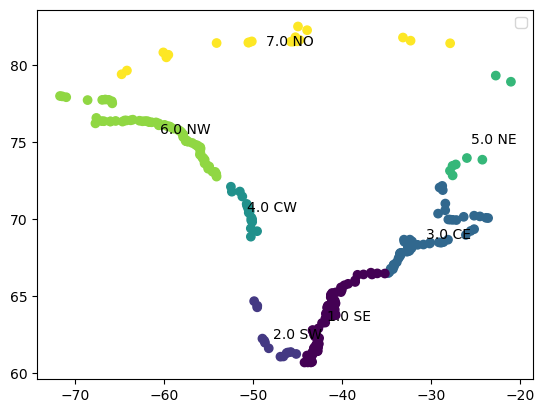

In [19]:
fig, ax = plt.subplots()

sectionNames = ['SE', 'SW', 'CE', 'CW', 'NE', 'NW', 'NO']

dict_sections = dict(zip(np.arange(1,8),['SE', 'SW', 'CE', 'CW', 'NE', 'NW', 'NO']))


ax.scatter(dfgatemeta['lon'], dfgatemeta['lat'], c=dfgatemeta['section_number'])

lons = dfgatemeta['lon'].groupby(dfgatemeta['section_number']).mean()
lats = dfgatemeta['lat'].groupby(dfgatemeta['section_number']).mean()
for i, nr in enumerate(lons.index):
    ax.scatter(lons[nr], lats[nr], s=0)
    ax.annotate(f"{nr} {sectionNames[i]}", (lons[nr], lats[nr]))


plt.legend()

In [20]:
dfErrorGate = pd.read_csv(path_Mankoff2020Solid + "gate_err.csv", index_col=0)
dfCoverageGate = pd.read_csv(path_Mankoff2020Solid + "gate_coverage.csv", index_col=0)
dfCoverageGate.head()

,1,3,4,5,6,7,8,10,11,12,...,346,347,349,350,352,353,354,355,356,357
Date,,,,,,,,,,,,,,,,,,,,,
1986-04-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-05-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-06-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-07-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
dfSectionD = pd.DataFrame(index=dfgadeD.index, columns=dfRegionD.columns)
dfSectionErr = pd.DataFrame(index=dfgadeD.index, columns=dfRegionD.columns)
dfSectionCoverage = pd.DataFrame(index=dfgadeD.index, columns=dfRegionD.columns)    

for section in range(1,7+1):
    sectionName = dict_sections[section]
    gates = dfgatemeta[dfgatemeta['section_number']==section].index
    dfgadeD.columns = dfgadeD.columns.astype(int) 
    dfErrorGate.columns = dfErrorGate.columns.astype(int)
    dfCoverageGate.columns = dfCoverageGate.columns.astype(int)
    dfSectionCoverage[sectionName] = dfCoverageGate.loc[:, gates.values].sum(axis=1)
    sectionName = dict_sections[section]
    dfSectionD[sectionName] = dfgadeD.loc[:, gates.values].sum(axis=1)
    dfSectionErr[sectionName] = dfErrorGate.loc[:, gates.values].sum(axis=1)
    dfSectionCoverage[sectionName] = dfCoverageGate.loc[:, gates.values].sum(axis=1)



    


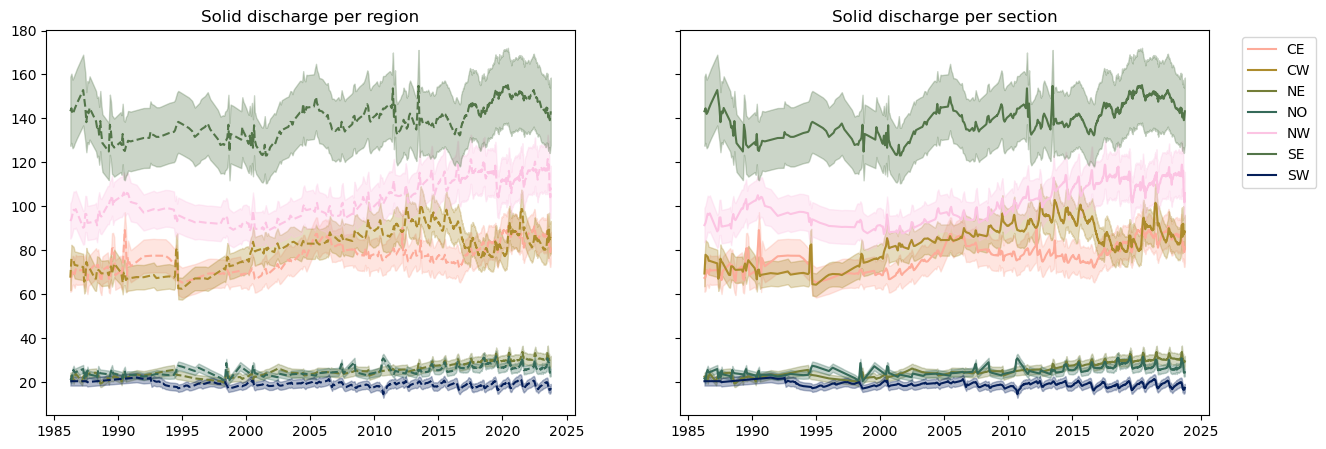

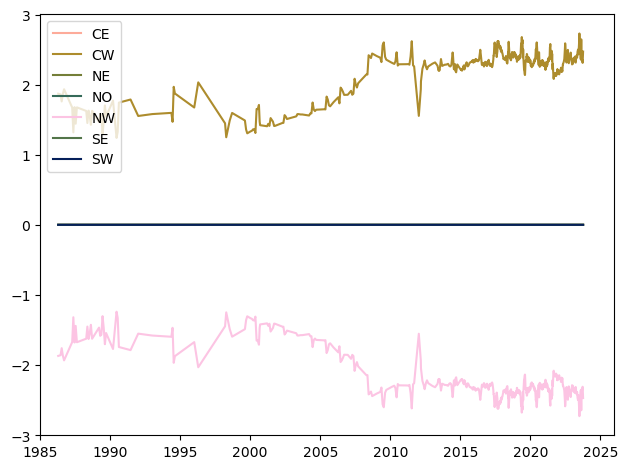

In [26]:
fig, (ax2, ax,) = plt.subplots(1, 2, sharex=True,sharey=True, figsize=(15, 5))
fig2, ax3 = plt.subplots(1, 1,)

for col in dfSectionD.columns:
    ax.plot(pd.to_datetime(dfSectionD.index), dfSectionD[col], label=col, c= dict_regionName_colors[col], linestyle='-',)
    ax2.plot(pd.to_datetime(dfRegionD.index), dfRegionD[col], label=col, c= dict_regionName_colors[col], linestyle='--')
    # difference
    ax3.plot(pd.to_datetime(dfSectionD.index), dfSectionD[col]-dfRegionD[col], label=col, c= dict_regionName_colors[col], linestyle='-')

    # fill in between error
    ax.fill_between(pd.to_datetime(dfSectionD.index), dfSectionD[col]-dfSectionErr[col], dfSectionD[col]+dfSectionErr[col], alpha=0.3, color=dict_regionName_colors[col])
    ax2.fill_between(pd.to_datetime(dfRegionD.index), dfRegionD[col]-dfErrorRegionD[col], dfRegionD[col]+dfErrorRegionD[col], alpha=0.3, color=dict_regionName_colors[col])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title("Solid discharge per section")
ax2.set_title("Solid discharge per region")
ax3.legend()
plt.xlim(pd.to_datetime('1985-01-01'), pd.to_datetime('2026-01-01'))
plt.tight_layout()

In [27]:
dfSectionD.to_csv(path_Mankoff2020Solid_adjusted + "section_D.csv")
dfSectionErr.to_csv(path_Mankoff2020Solid_adjusted + "section_err.csv")
dfSectionCoverage.to_csv(path_Mankoff2020Solid_adjusted + "section_coverage.csv")

In [ ]:
dict_regionName_colors = {k: dict_region_colors[v] for k, v in inverted_dict_Moug.items()}

<Axes: xlabel='Date'>

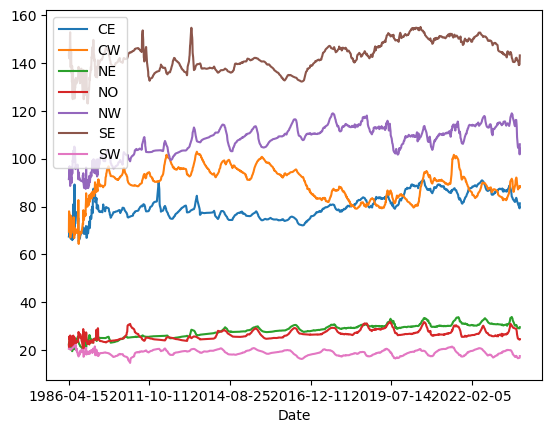

In [28]:
dfSectionD.plot()